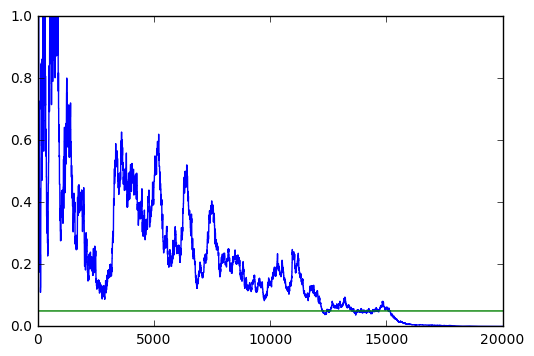

In [1]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

# contingency table
#        click       no click
#------------------------------
# ad A |   a            b
# ad B |   c            d
#
# chi^2 = (ad - bc)^2 (a + b + c + d) / [ (a + b)(c + d)(a + c)(b + d)]
# degrees of freedom = (#cols - 1) x (#rows - 1) = (2 - 1)(2 - 1) = 1

# short example

# T = np.array([[36, 14], [30, 25]])
# c2 = np.linalg.det(T)**2 * T.sum() / ( T[0].sum()*T[1].sum()*T[:,0].sum()*T[:,1].sum() )
# p_value = 1 - chi2.cdf(x=c2, df=1)

# equivalent:
# (36-31.429)**2/31.429+(14-18.571)**2/18.571 + (30-34.571)**2/34.571 + (25-20.429)**2/20.429


class DataGenerator:
  def __init__(self, p1, p2):
    self.p1 = p1
    self.p2 = p2

  def __next__(self):
    click1 = 1 if (np.random.random() < self.p1) else 0
    click2 = 1 if (np.random.random() < self.p2) else 0
    return click1, click2


def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
  p = 1 - chi2.cdf(x=c2, df=1)
  return p


def run_experiment(p1, p2, N):
  data = DataGenerator(p1, p2)
  p_values = np.empty(N)
  T = np.zeros((2, 2)).astype(np.float32)
  for i in range(N):
    c1, c2 = next(data)
    T[0,c1] += 1
    T[1,c2] += 1
    # ignore the first 10 values
    if i < 10:
      p_values[i] = None
    else:
      p_values[i] = get_p_value(T)
  plt.plot(p_values)
  plt.plot(np.ones(N)*0.05)
  plt.show()

run_experiment(0.1, 0.11, 20000)
